In [1]:
using Distributions
using Statistics
include("funtions.jl")

sen (generic function with 1 method)

In [4]:
using BenchmarkTools

In [6]:
#Procederemos a modificar la funcion para que reciba otra funciones

In [7]:
function PSO1(d, l, u, Part_N, Max_iter,f)
    
  #Proceso de inicialización de PSO
  x = l' .+ rand(Uniform(0,1), Part_N, d) .* (u - l)'
  #Evalua la función objetivo
  obj_func = [f(x[i]) for i=1:Part_N]
  #Obtiene el mejor valor global(mínimo)
  glob_opt = minimum(obj_func)
  ind = argmin(obj_func)
  #Vector de valores optimos
  G_opt = reshape(x[ind, :], 1, d) * ones(d, Part_N)
  Mejor_pos = x[ind, :]
  #Mejor local para cada partícula
  Loc_opt = x
    
  #Inicializa velocidades
  v = zeros(Part_N, d)

  #Vector para poder evaluar las nuevas posiciones
  #en la función objetivo
  Nva_obj_func = zeros(1, Part_N)
  Evol_func_obj = zeros(1, Max_iter)
    
  #Inicia proceso de optimización PSO
  t = 1
  #Criterio de paro
  while t < Max_iter
    #Calcula la nueva velocidad
    v = v .+ rand(Uniform(0,1), Part_N, d) .* (Loc_opt - x) .+ rand(d)' .* (G_opt' .- x)
    #Calcula nueva posición
    x = x .+ v
    #Se verifica que las partículas no se salan de los límites
    for i=1:Part_N
      if x[i, :] > u
        x[i, :] = u
      elseif x[i, :] < l
        x[i, :] = l
      end
      #Se evalúan las nuevas posiciones en la funcion objetivo
      Nva_obj_func[i] = f(x[i])
      #Se verifica si se actualizaron los óptimos locales
      if Nva_obj_func[i] < obj_func[i]
        #Actualiza óptimo local
        Loc_opt[i, :] = x[i, :]
        #Actualiza función objetivo
        obj_func[i] = Nva_obj_func[i]
      end
    end
    #Obtiene el mejor valor global
    Nvo_glob_opt = minimum(obj_func)
    ind = argmin(obj_func)
    #Se verifica si se actualiza el óptimo global
    if Nvo_glob_opt < glob_opt
      glob_opt = Nvo_glob_opt
      #Obtenemos los valores óptimos en cada dimensión
      G_opt[:] = reshape(x[ind, :], 1, d) * ones(d, Part_N)
      Mejor_pos = x[ind, :]
    end
    #Almacena los valores de función objetivo en cada iteración
    Evol_func_obj[t] = glob_opt
    #Incrementa iteraciones
    t = t + 1
  end
  
  return Mejor_pos
end

PSO1 (generic function with 1 method)

In [8]:
#Pruebas
#Procederemos a hacer 2 pruebas con 2 funciones diferentes 


In [9]:
using Plots

In [10]:
function cuad(x)
    return x^2
end
    

cuad (generic function with 1 method)

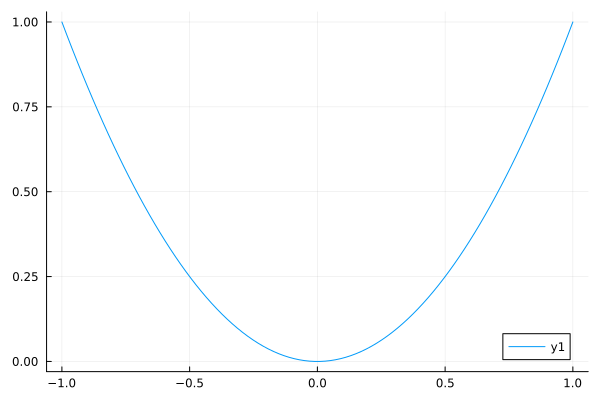

In [11]:
#Gráfica de x², vemos que hay un mínimo en 0
x = range(-1,1, length=100)
plot(x,cuad)

In [12]:
PSO1(1,[-1],[1],100,100,cuad)

1-element Vector{Float64}:
 2.0788861496090494e-5

In [13]:
@benchmark PSO1(1,[-1],[1],100,100,cuad)

BenchmarkTools.Trial: 626 samples with 1 evaluation.
 Range (min … max):  7.317 ms …  13.546 ms  ┊ GC (min … max): 0.00% … 27.14%
 Time  (median):     7.738 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   7.987 ms ± 827.966 μs  ┊ GC (mean ± σ):  1.63% ±  5.72%

    ▂▇█▇▃                                                      
  ▃▅█████▆▆▃▅▃▃▄▄▄▃▄▃▃▂▂▁▁▂▁▁▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▂▂▁▁▁▁▂▃▂▂▁▂▂▂▂▁▂ ▃
  7.32 ms         Histogram: frequency by time        11.9 ms <

 Memory estimate: 2.51 MiB, allocs estimate: 81920.

In [14]:
function sen(x)
    return sin(x)
end

sen (generic function with 1 method)

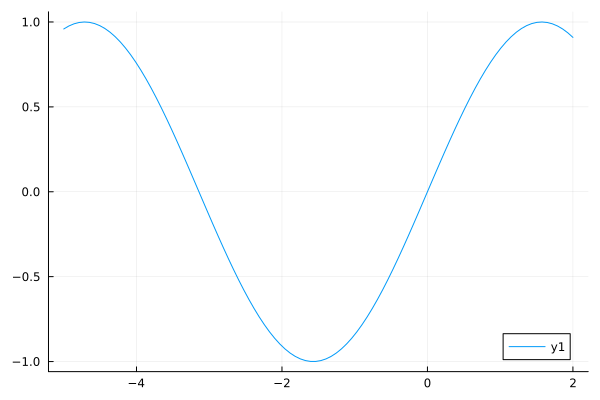

In [15]:
#Gráfica de seno(x), donde vemos que tiene un mínimo en -pi/2
x = range(-5,2, length=100)
plot(x,sen)

In [16]:
PSO1(1,[-3],[-1],100,100,sen)

1-element Vector{Float64}:
 -1.5709465910479046

In [17]:
@benchmark PSO1(1,[-3],[-1],100,100,sen)

BenchmarkTools.Trial: 602 samples with 1 evaluation.
 Range (min … max):  7.444 ms …  13.862 ms  ┊ GC (min … max): 0.00% … 28.06%
 Time  (median):     8.024 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   8.305 ms ± 899.615 μs  ┊ GC (mean ± σ):  1.66% ±  5.81%

      ▅██▄                                                     
  ▂▃▄█████▇█▇▆▄▄▄▄▃▃▃▃▂▃▂▂▂▂▁▁▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁▁▂▁▁▂▁▂▂▂▂▂▂▁▃ ▃
  7.44 ms         Histogram: frequency by time        12.3 ms <

 Memory estimate: 2.46 MiB, allocs estimate: 80921.